### High Risk Pregnancy Prediction model using Random Forest Algorithm

In [1]:
#!pip install pandas scikit-learn matplotlib seaborn
#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



In [2]:
csv_file = "Maternal Health Risk Data Set.csv"

# Read CSV into DataFrame
df = pd.read_csv(csv_file)

print("Dataset loaded")
print("First 5 rows:")
print(df.head())


Dataset loaded
First 5 rows:
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [3]:
# Modify Dataset
X = df.drop(columns=["RiskLevel"])
y = df["RiskLevel"]


In [4]:
# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y) #Output coloumn
print("Class mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Class mapping: {'high risk': np.int64(0), 'low risk': np.int64(1), 'mid risk': np.int64(2)}


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_encoded, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y_encoded)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:

# Using RandomForest model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))



Classification Report:
              precision    recall  f1-score   support

   high risk       0.96      0.95      0.95        55
    low risk       0.90      0.80      0.85        81
    mid risk       0.75      0.87      0.81        67

    accuracy                           0.86       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.86      0.86       203



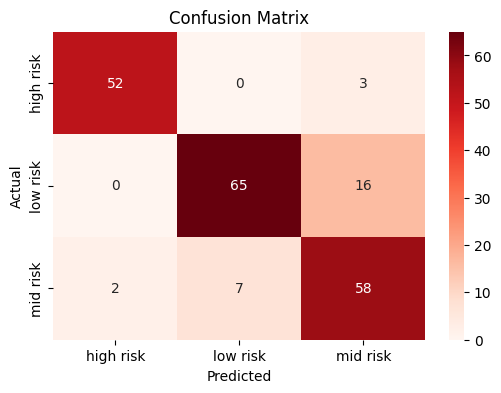

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


/var/folders/6p/rjflbbz10cx1c9g8vlr9x4yw0000gn/T/ipykernel_16476/269370197.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


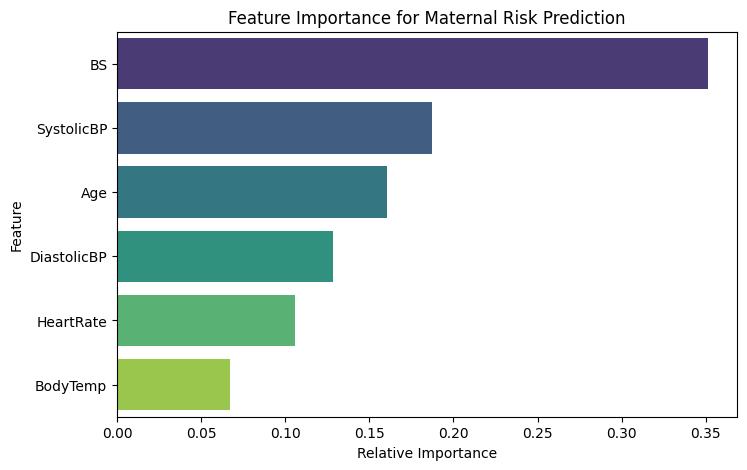

In [8]:

#Weightage of each factors
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance for Maternal Risk Prediction")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.show()


In [9]:

# Prediction Model
def predict_new_patient(data_dict):
    """
    data_dict: dictionary with keys matching feature names from dataset
    Example: {"Age": 30, "SystolicBP": 130, "DiastolicBP": 80, "BS": 12, "BodyTemp": 98.6, "HeartRate": 75}
    """
    new_df = pd.DataFrame([data_dict])
    new_scaled = scaler.transform(new_df)
    pred_class = model.predict(new_scaled)[0]
    return le.inverse_transform([pred_class])[0]


In [10]:

# Test Data:
example_patient = {
    "Age": 28,
    "SystolicBP": 120,
    "DiastolicBP": 80,
    "BS": 10.5,
    "BodyTemp": 98.2,
    "HeartRate": 78
}
print("\nExample patient prediction:", predict_new_patient(example_patient))


Example patient prediction: high risk
